In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns", None)

In [2]:
cancer = pd.read_csv('breast-cancer.csv')
cancer.head()
cancer.info()

In [29]:
cancer.describe()
cancer.corr()
cancer
cancer['diagnosis'] = cancer.diagnosis.replace('M', 0)
cancer['diagnosis'] = cancer.diagnosis.replace('B', 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<AxesSubplot:>

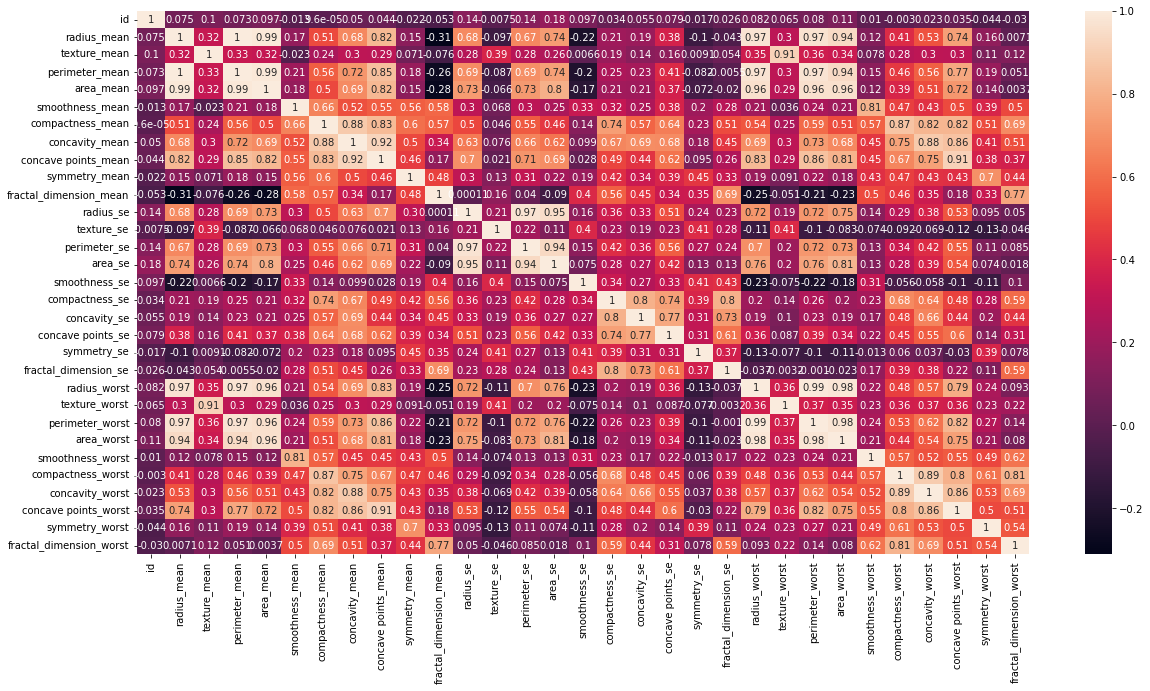

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(cancer.corr(),annot=True)

In [37]:
x = cancer.drop('diagnosis', axis = 1)
y = cancer['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=42)


#classification algorithms

In [54]:
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
clf = LogisticRegression(random_state=0)
clm = svm.SVC()
knn = KNeighborsClassifier(n_neighbors=3)

xgb_model.fit(x_train, y_train)
clf.fit(x_train, y_train)
clm.fit(x_train, y_train)
knn.fit(x_train, y_train)


[01:34:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/ebukaezenwafor/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


KNeighborsClassifier(n_neighbors=3)

In [60]:
xgb_model.predict(x)
clf.predict(x)
clm.predict(x)
knn.predict(x)
print('clm score is ',clm.score(x_train, y_train))
print('knn score is ',knn.score(x_train, y_train))
print('xgb_model score is ',xgb_model.score(x_train, y_train))
print('clf score is ',clf.score(x_train, y_train))

clm score is  0.6291079812206573
knn score is  0.9107981220657277
xgb_model score is  1.0
clf score is  0.6291079812206573
